In [1196]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [1205]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, input_dim=16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
#model.add(layers.Dense(4, activation='relu'))
#model.add(layers.Dense(2, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [1206]:
model.summary()

Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_640 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_641 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_642 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_643 (Dense)            (None, 1)                 9         
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [1207]:
model.compile(loss='MSE', optimizer=tf.keras.optimizers.SGD(0.00001), metrics=['accuracy'])

In [1208]:
data = pd.read_csv('energy_efficiency_data.csv')
heating = data.pop('Heating Load')
cooling = data.pop('Cooling Load')
Orient = pd.get_dummies(data['Orientation'])
Glazing = pd.get_dummies(data['Glazing Area Distribution'])
data = pd.concat([data,pd.get_dummies(data['Orientation'], prefix='Orientation')],axis=1)
data = pd.concat([data,pd.get_dummies(data['Glazing Area Distribution'], prefix='Glazing Area Distribution')],axis=1)
data.drop(['Orientation'],axis=1, inplace=True)
data.drop(['Glazing Area Distribution'],axis=1, inplace=True)

In [1209]:
X_train, X_test, y_train, y_test = train_test_split(data, heating, test_size=0.25, random_state=42)

In [1210]:
model.fit(X_train.to_numpy(), y_train.to_numpy(),batch_size=16, epochs=200)

Epoch 1/200
36/36 [==============================] - 0s 554us/step - loss: 7479.0757 - accuracy: 0.0000e+00
Epoch 2/200
36/36 [==============================] - 0s 637us/step - loss: 122.6784 - accuracy: 0.0000e+00
Epoch 3/200
36/36 [==============================] - 0s 582us/step - loss: 116.1037 - accuracy: 0.0000e+00
Epoch 4/200
36/36 [==============================] - 0s 582us/step - loss: 106.6669 - accuracy: 0.0000e+00
Epoch 5/200
36/36 [==============================] - 0s 582us/step - loss: 92.8777 - accuracy: 0.0000e+00
Epoch 6/200
36/36 [==============================] - 0s 609us/step - loss: 78.9713 - accuracy: 0.0000e+00
Epoch 7/200
36/36 [==============================] - 0s 582us/step - loss: 65.1566 - accuracy: 0.0000e+00
Epoch 8/200
36/36 [==============================] - 0s 554us/step - loss: 50.1855 - accuracy: 0.0000e+00
Epoch 9/200
36/36 [==============================] - 0s 637us/step - loss: 43.8015 - accuracy: 0.0000e+00
Epoch 10/200
36/36 [=====================

36/36 [==============================] - 0s 582us/step - loss: 38.0926 - accuracy: 0.0000e+00
Epoch 78/200
36/36 [==============================] - 0s 554us/step - loss: 37.2623 - accuracy: 0.0000e+00
Epoch 79/200
36/36 [==============================] - 0s 554us/step - loss: 38.0072 - accuracy: 0.0000e+00
Epoch 80/200
36/36 [==============================] - 0s 582us/step - loss: 36.4163 - accuracy: 0.0000e+00
Epoch 81/200
36/36 [==============================] - 0s 582us/step - loss: 37.0858 - accuracy: 0.0000e+00
Epoch 82/200
36/36 [==============================] - 0s 611us/step - loss: 37.4893 - accuracy: 0.0000e+00
Epoch 83/200
36/36 [==============================] - 0s 583us/step - loss: 37.8353 - accuracy: 0.0000e+00
Epoch 84/200
36/36 [==============================] - 0s 582us/step - loss: 36.2389 - accuracy: 0.0000e+00
Epoch 85/200
36/36 [==============================] - 0s 554us/step - loss: 37.1229 - accuracy: 0.0000e+00
Epoch 86/200
36/36 [==============================

36/36 [==============================] - 0s 554us/step - loss: 36.0987 - accuracy: 0.0000e+00
Epoch 154/200
36/36 [==============================] - 0s 582us/step - loss: 36.1958 - accuracy: 0.0000e+00
Epoch 155/200
36/36 [==============================] - 0s 553us/step - loss: 36.6830 - accuracy: 0.0000e+00
Epoch 156/200
36/36 [==============================] - 0s 554us/step - loss: 37.4482 - accuracy: 0.0000e+00
Epoch 157/200
36/36 [==============================] - 0s 554us/step - loss: 36.6701 - accuracy: 0.0000e+00
Epoch 158/200
36/36 [==============================] - 0s 582us/step - loss: 36.7060 - accuracy: 0.0000e+00
Epoch 159/200
36/36 [==============================] - 0s 527us/step - loss: 35.7063 - accuracy: 0.0000e+00
Epoch 160/200
36/36 [==============================] - 0s 554us/step - loss: 37.3015 - accuracy: 0.0000e+00
Epoch 161/200
36/36 [==============================] - 0s 554us/step - loss: 36.6799 - accuracy: 0.0000e+00
Epoch 162/200
36/36 [=====================

In [1211]:
answer = model.predict(X_test.to_numpy())

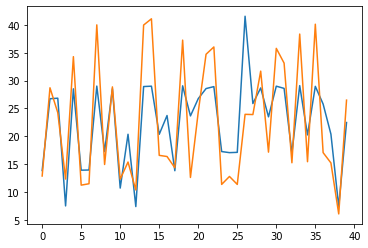

In [1212]:
import matplotlib.pyplot as plt
t = range(len(answer))
plt.plot(t[:40],answer[:40])
plt.plot(t[:40],y_test[:40])

In [1167]:
answer

array([[13.894685 ],
       [26.742529 ],
       [26.850086 ],
       [ 7.4389267],
       [28.644426 ],
       [13.937743 ],
       [14.002241 ],
       [29.028002 ],
       [17.297411 ],
       [28.677814 ],
       [10.713372 ],
       [20.590834 ],
       [ 7.4502115],
       [29.094704 ],
       [29.119621 ],
       [20.530275 ],
       [23.790283 ],
       [13.957198 ],
       [29.130676 ],
       [23.776665 ],
       [26.780708 ],
       [28.688774 ],
       [29.126156 ],
       [17.315556 ],
       [17.245604 ],
       [17.311039 ],
       [41.732273 ],
       [25.885338 ],
       [28.695635 ],
       [23.83164  ],
       [28.99947  ],
       [28.626257 ],
       [17.272049 ],
       [29.088871 ],
       [20.547611 ],
       [29.121962 ],
       [25.673464 ],
       [20.574509 ],
       [ 7.3591943],
       [22.474005 ],
       [29.07528  ],
       [13.885612 ],
       [20.383476 ],
       [23.84604  ],
       [23.66327  ],
       [20.481958 ],
       [28.614485 ],
       [28.69